In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import datetime

In [ ]:
url = 'https://raw.githubusercontent.com/Iqbalpr/Data_Dummy-Tanggal-waktu-dan-tempat-/main/Data_Dummy%2024%20jam.csv'
Data = pd.read_csv(url)
Data

,Date,Time,Place
0,1/3/2022,0:00:00,Utan Kayu Selatan
1,1/3/2022,1:00:00,Utan Kayu Selatan
2,1/3/2022,2:00:00,Utan Kayu Selatan
3,1/3/2022,3:00:00,Utan Kayu Selatan
4,1/3/2022,4:00:00,Utan Kayu Selatan
...,...,...,...
475,20/3/2022,19:00:00,Utan Kayu Selatan
476,20/3/2022,20:00:00,Utan Kayu Selatan
477,20/3/2022,21:00:00,Utan Kayu Selatan
478,20/3/2022,22:00:00,Utan Kayu Selatan


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    480 non-null    object
 1   Time    480 non-null    object
 2   Place   480 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


# **Point of Interest**

1. Mencari tahu tempat bekerja pemilik data dengan cara memfilter keberadaan dari jam 9:00 sampai 16:00

In [ ]:
# Kita ubah Dtype kolom time menjadi datatime untuk memudahkan kita memfilter waktunya nanti
Data['Time'] = pd.to_datetime(Data['Time'])
Data.info()
Data.set_index('Time', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    480 non-null    object        
 1   Time    480 non-null    datetime64[ns]
 2   Place   480 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 11.4+ KB


In [ ]:
Bekerja = Data.between_time('9:00','16:00').groupby('Place').size()
Bekerja.reset_index(name = 'Lama Kunjungan')

,Place,Lama Kunjungan
0,Tanjung Barat,112
1,Tugu,48


***Tanjung Barat*** memiliki waktu kunjungan yaitu selama ***112 jam*** dalam rentang waktu jam 09:00 sampai 17:00 selama 20 hari. Sehingga diperkirakan jika ***Tanjung Barat*** merupakan lokasi tempat kerja pemilik data.

**-----------------------------------------------------------------------------**

2. Mencari tahu tempat tinggal pemilik data dengan cara memfilter keberadaan dari jam 23:00 sampai 4:00

In [ ]:
Bekerja = Data.between_time('23:00','4:00').groupby('Place').size()
Bekerja.reset_index(name = 'Lama Kunjungan')

,Place,Lama Kunjungan
0,Utan Kayu Selatan,120


***Utan Kayu Selatan*** memiliki waktu kunjungan selama ***102 jam*** dan satu satunya lokasi keberadaan pemilik data dalam rentang waktu jam 23:00 - 04:00 selama 20 hari. Sehingga diperkirakan jika ***Utan Kayu Selatan*** merupakan lokasi tempat tinggal pemilik data.

# **Rute Favorit**

In [ ]:
Data.reset_index(inplace = True)

In [ ]:
Graf = nx.from_pandas_edgelist(Data, 'Date', 'Place', edge_attr=True, create_using=nx.MultiDiGraph())

<function matplotlib.pyplot.show>

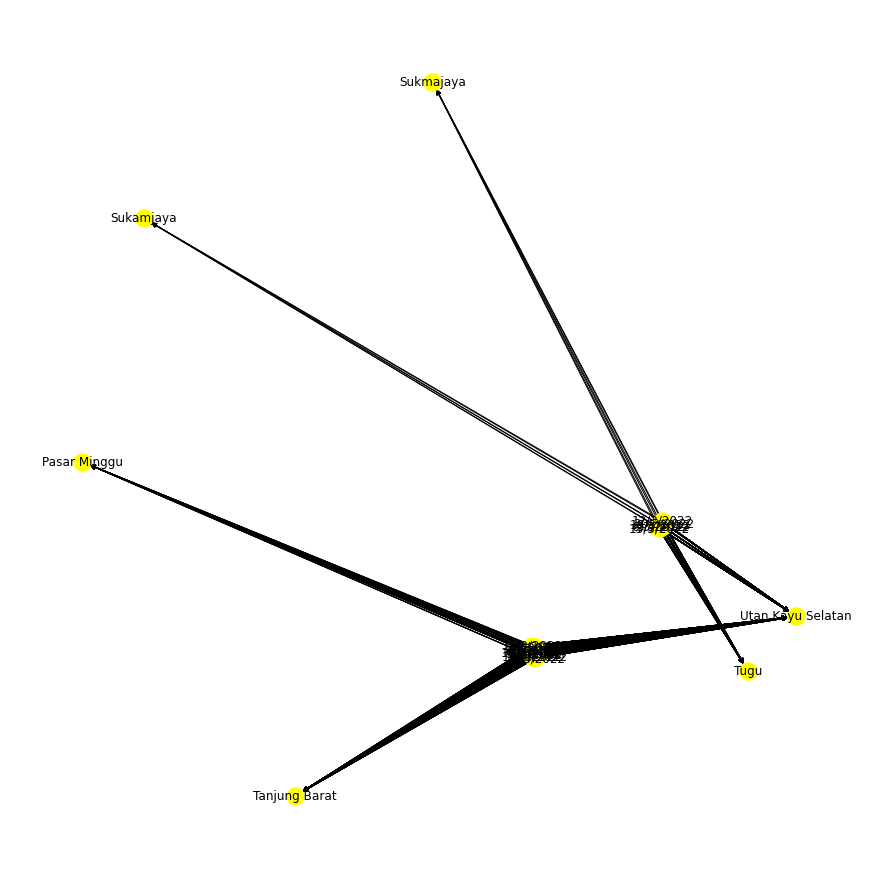

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(Graf)
nx.draw(Graf, with_labels=True, node_color='yellow', edge_cmap=plt.cm.Blues, pos=pos)

plt.show

Dengan bantuan Graf di atas, menunjukan rute terfavorit yang sering dilewati. Semakin tebal garis maka menandakan rute yang paling banyak dilewati adalah **Utan Kayu Selatan**, **Pasar Minggu** dan **Tanjung Barat**